<h2><b>1. NLP Basics</b></h2>
<h3><b>What are NLP and NLTK</b></h3>

<p>There are various definitions out there, but one that I like is this: Natural language processing is a field concerned with the ability of a computer to understand, analyze, manipulate, and potentially generate human language. By human language, we're simply referring to any language used for everyday communication. This can be English, Spanish, French, anything like that.</p>
<p>Now it's worth noting that Python doesn't naturally know what any given word means. All it will see is a string of characters. For instance, it has no idea what natural actually means. It sees that it's seven characters long, but the individual characters don't mean anything to Python and certainly the collection of those characters together don't mean anything, either. So we know that, what an N is, what an A is, and we know that together, those seven characters makes up the word natural, and we know what that means. So NLP is the field of getting the computer to understand what naturally actually signifies, and from there we can get into the manipulation or potentially even generation of that human language.</p>
<p>Three main use case of NLP are Spam filter, Auto-complete and Auto-correct</p>
<p>NLP encompasses many topics including
<li>Sentiment analysis</li>
<li>Topic modelling </li>
<li>Text classification </li>
<li>Sentence segmentation or part of speech tagging</li>
<p><b>NLTK</b>-The natural language toolkit is the most utilized package for handling natural language processing tasks in Python. Usually called NLTK for short, it is a suite of open-source tools originally created in 2001 at the University of Pennsylvania for the purpose of making building NLP processes in Python easier. This package has been expanded through the extensive contributions of open-source users in the years since its original development. NLTK is great because it basically provides a jumpstart to building any NLP process by giving you the basic tools that you can then chain together to accomplish your goal rather than having to build all those tools from scratch. A lot of tools are packaged into NLTK, and in the next section we'll dive into downloading the package and exploring some of those tools.</p>
  

<h3><b>NLTK setup and Overview</b></h3>

In [1]:
pip install -U nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ 

True

In [3]:
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'D

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] #first 10 elements of stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

<p> What we're going to tell Python to do is start at the zeroth element, or the element in the zeroth position, and go up through the element in the 500th position, and we only want it to print out in increments of 25.</p>

In [6]:
from nltk.corpus import stopwords
stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

<h3><b>Reading text data</b></h3>

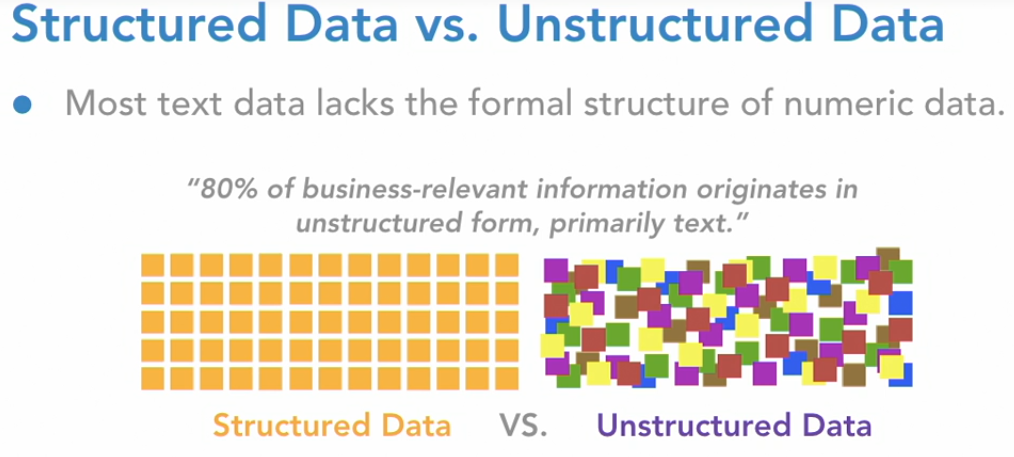

<p>What makes a file Unstructured: No delimeters used,
Binary data, no indication of rows</p>
<p><b>Read in semi structured data</b></p>

In [7]:
#read in raw data
rawData = open('SMSSpamCollection.tsv').read()

#print the raw data
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [8]:
#replacing \n with \n and split at \n
parsedData= rawData.replace('\t','\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

Now, creating new lists with labels and body in two different lists

In [9]:
#0 indicates label column, 1 indicates body column, 2 indicates all the text
#relevant to that column
labelList = parsedData[0::2]
textList = parsedData[1::2]
print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


We need to create a dictionary using Pandas, of label list and text list but before that lets make sure both labels and texts are of same length.

In [10]:
import pandas as pd
print(len(labelList))
print(len(textList))

5571
5570


In [11]:
#lets check last five entries of labellist
labelList[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [12]:
#we need to exlude the last empty label while creating dictionar here
fullCorpus = pd.DataFrame({
    'label': labelList[:-1],
    'body_list': textList
})
fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [13]:
#we can also simply convert the tsv file to a readable csv
#make sure to keep header = none or else first entry will be recorded as header

dataset = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


<h3><b>Exploring the Dataset</b></h3>

In [14]:
import pandas as pd
fullCorpus = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
fullCorpus.columns = ['label', 'body_text']
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [15]:
#what is the shape of the dataset
print("Input data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

Input data has 5568 rows and 2 columns


In [16]:
#how many spam or ham are there?
print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus),
                                                        len(fullCorpus[fullCorpus['label']=='spam']),
                                                        len(fullCorpus[fullCorpus['label']=='ham'])))

Out of 5568 rows, 746 are spam, 4822 are ham


In [17]:
#how much missing data is there
print("Number of null in label: {}".format(fullCorpus['label'].isnull().sum()))
print("Number of null in text: {}".format(fullCorpus['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


<h3><b>Regular Expressions</b></h3>
<p><b>These are the text strings describing a search pattern</b></p>
<li>'nlp': searches for nlp in our text</li>
<li>'[j-q]': searches for all characters between j and q</li>
<li>'[j-q]+': searches for j to q characters with the following characters in a word</li>
<li>'[0-9]+': similar to above</li>
<li>'[j-q0-9]+': searches characters in the range with numbers in the range given without a space in between them (for ex: java2014)</li>

<p><b>Why are regular expressions useful?</b></p>
<li>Identifying whitespaces between words/tokens</li>
<li>Identifying or creating delimiters or end of line escape characters</li>
<li>Removing punctuation or numbers from your text</li>
<li>Cleaning html tags from the text</li>
<li>Identifying some textual patterns you're interested in</li>

<p><b>Use cases</b></p>
<li> Confirming passwords to meet the criteria</li>
<li> Searching url for some substring</li>
<li> Searching for files on your computer</li>
<li> Document scraping</li>






<h3><b> Learning how to use Regular expressions</b></h3>


In [18]:
#Common package used here is regex resource
import re
re_test = 'This is a made up string to test 2 regex methods'
re_test_messy = 'This      is a made up     string to test 2    diiferent regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""regex-methods'

In [19]:
#splitting a sentence into a list of words
re.split('\s', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'regex',
 'methods']

In [20]:
re.split('\s', re_test_messy)

['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'diiferent',
 'regex',
 'methods']

In [21]:
#To overcome the whitespaces above we need to add '\s+'
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'diiferent',
 'regex',
 'methods']

In [22]:
re.split('\s+', re_test_messy1)
#simple regex cannot hande more complicated strings with special characters

['This-is-a-made/up.string*to>>>>test----2""""""regex-methods']

In [23]:
#changing '\s' with\'W':non word charachters with spaces, to search for space and special characters
re.split('\W+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'regex',
 'methods']

In [24]:
#Now lets use findall method
re.findall('\S+', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'regex',
 'methods']

In [25]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'diiferent',
 'regex',
 'methods']

In [26]:
re.findall('\S+', re_test_messy1)
#it still considers special characters as words

['This-is-a-made/up.string*to>>>>test----2""""""regex-methods']

In [27]:
#lets use \W instead of \S
re.findall('\w+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'regex',
 'methods']

<p><b>Takeaways</b></p>
<li> Usefull methods for tokenizing: findall(), split()</li>
<li> Useful regexes for tokenizing:-'\W'or'\w' for words with special char and spaces -'\S'or'\s' only for words with spaces</li>


<h3><b>Regular expression replacements</b></h3>


In [28]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [29]:
import re
re.findall('[a-z]+', pep8_test) #output indicates findall() is case sensitive

['try', 'to', 'follow', 'guidelines']

In [30]:
re.findall('[A-Z]+', pep8_test)

['I', 'PEP']

In [31]:
re.findall('[A-Z]+[0-9]+', pep8_test)

['PEP8']

In [32]:
re.findall('[A-Z0-9]+', pep8_test)

['I', 'PEP8']

In [33]:
re.findall('[A-Z]+[0-9]+', peep8_test)

['PEEP8']

In [34]:
#Re-placing tokens with given string
re.sub('[A-Z]+[0-9]+','PEP8 python', pep8_test)

'I try to follow PEP8 python guidelines'

In [35]:
re.sub('[A-Z]+[0-9]+','PEP8 python', pep7_test)

'I try to follow PEP8 python guidelines'

<p> Other examples of regex methods <li> re.search()</li><li>re.match()</li><li>re.fullmatch</li><li>re.finditer()</li><li>re.escape()</li></p>

<h3><b>Pre-Processing Text Data </b></h3>
<p>Cleaning up the text data is necessary to highlight attributes that you are going to want your machine learning system to pick up on. Cleanig of data typically consists of necessary steps:
<li>Remove punctuation</li>
<li>Tokenization</li>
<li>Remove Stopwords</li>
<li>Lemmatize or Stem</li>
<h3><b>Removing Puctuation </b></h3>

In [36]:
import pandas as pd
pd.set_option('display.max_colwidth',100)
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [37]:
#string function in python has all the puctuations stored lets see
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#example to understand punctuations impact on a string
'I like NLP.' == 'I like NLP'

False

In [39]:
#Now lets remove punctuations from our data
def remove_punct(text):
    text_nopunct = ([char for char in text if char not in string.punctuation])
    return text_nopunct

data['body_text_clean']=data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, i, n, g, , f, o, r, , t, h, e, , r, i, g, h, t,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, , a, , w, k, l, y, , c, o, m, p, , t, o, , w,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[N, a, h, , I, , d, o, n, t, , t, h, i, n, k, , h, e, , g, o, e, s, , t, o, , u, s, f, ,..."
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, , i, s, , n, o, t, , l, i, k, e, , t, o, , s,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, N, , S, U, N, D, A, Y, , W, I, T, H, , W, I, L, L]"


In [40]:
#as we had mentioned the characters to show separately it is separating each character with a ,
#to join the words together
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['body_text_clean']=data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


<h3><b>Tokenization</b></h3>
<p>Splitting a string or sentences into list of words</p>


In [41]:
import re
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenized']=data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

#we are using .lower to tackle python's case sensitive issue

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


<h3><b>Remove Stopwords</b></h3>


In [42]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [43]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

data['body_text_nostop']=data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


<h2><b>2. Supplemental Data cleaning </b></h2>
<h3><b>Introducing stemming</b></h3>
<p><b> What is stemming?</b>: Process of reducing inflected words(or sometives derived) to their root form. OR Crudely chopping off the end of the words only to the base. OR Removing the suffixes from the words.</p>
<p><b>Benefits of stemming:</b><li>Reduces the corpus of words the model is exposed to</li><li>Expllicitly correlates the words with similar meaning</li></p>
<p><b>Disadvantages</b> of stemming are that sometimes even if the root word is same the suffix added to those words create a different mening but stemming considers it to be the same words.</p>
<p><b>Some polpular stemming are:</b>Porter stemmer, Snowball stemmer, Lancaster, Regex-Based stemmer.</p>  

<h3><b>Implementing stemming</b></h3>


In [44]:
import nltk
ps = nltk.PorterStemmer()

In [45]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [46]:
print(ps.stem('grows'), ps.stem('growing'), ps.stem('grow'))

grow grow grow


In [47]:
print(ps.stem('run'), ps.stem('runner'), ps.stem('running'))

run runner run


In [48]:
def stemming(tokenized_list):
    text = [ps.stem(word) for word in tokenized_list]
    return text

data['body_text_stemmed']=data['body_text_nostop'].apply(lambda x: stemming(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


<h3><b>Lemmatizing</b></h3>
<p>Process of grouping together the inflected forms of the words so they can be analysed as a single term, identified as a word's lemma</p>
<p>Using vocabulary analysis of a words aiming to remove inflectional endings to return the dictionary form of a word.</p>
<p><b>Lemmatizing vs Stemming</b></p>
<p>Goal of both of these process is to condense derived words into a base form of the word. But the difference is:<li>Stemming is typically faster as it simply chps of the end of a word using heuristics, without any understanding of the context the word is used.</li><li>Lemmatizing is typically more accurate as it uses informed analysis to create groups of words with similar meaning based on the context around the word.</li>

<h3><b>Using a lemmatizer</b></h3>


In [49]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [50]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_morphy',
 'lemmatize',
 'morphy']

In [51]:
print(ps.stem('meanness'),ps.stem('meaning'))
print(wn.lemmatize('meanness'),wn.lemmatize('meaning'))

mean mean
meanness meaning


In [52]:
#both goose and geese are derived from same word
#lets see which predict it correctly
print(ps.stem('goose'),ps.stem('geese'))
print(wn.lemmatize('goose'),wn.lemmatize('geese'))
#lemmatizer predict correctly both as goose
#whereas lemmatizer just chopped of 'e' from both

goos gees
goose goose


In [53]:
def lemmatizing(tokenized_list):
    text = [wn.lemmatize(word) for word in tokenized_list]
    return text

data['body_text_lemmatized']=data['body_text_nostop'].apply(lambda x: lemmatizing(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


<h2><b>3. Vectorizing Raw data</b></h2>
<h3><b>Introduction</b></h3>
<p><b>Vectorizing:</b> Process of encoding texts as integers to create feature vectors.(converting into numeric matrix form)</p>
<p><b>Feature vectors:</b> An n-dimensional vectors of numerical features that represent some object.</p>
<p><b>Vectorization Example</b></p>


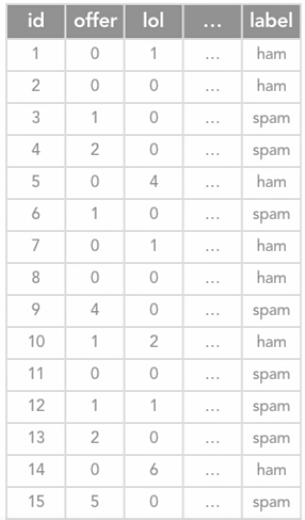

<p> Let's look at what this actually means. Going back to our spam ham dataset, let's look at this extremely simplistic example where we only have 15 text messages and we want to classify them each as either spam or ham. Let's just say there are 400 unique words across those 15 text messages. That would mean our matrix, after vectorizing, would still have 15 rows just like this one does, one per text message. And it would have 400 columns, one for each unique word. And each cell entry would count the number of times that word was used in each text message. Again, this is called your document term matrix. This matrix I'm showing here is a subset of your full document term matrix. We're just focusing on two words here used in text messages, offer and lol, along with the label of either spam or ham. But again, in reality, this ... here would represent the other 398 words that were used across these text messages. So that's what this looks like after vectorizing.</p>
<p>Now how does a machine learning model use this information to learn what these words mean? I mentioned before that by looking at the counts in the cells, that it can start to correlate which words happen in combination with certain labels. </p>


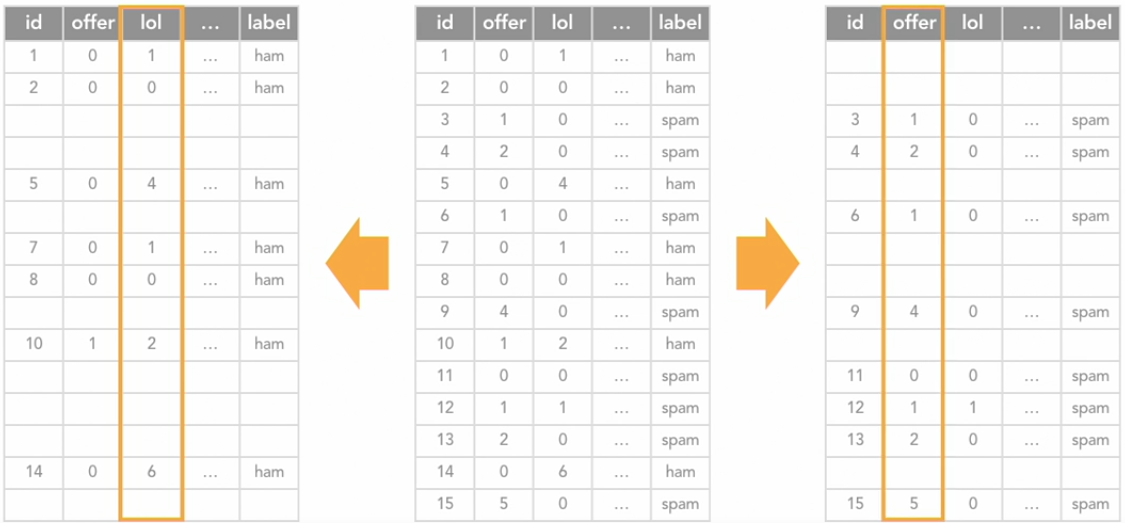

<p>So let's isolate just the non-spam messages here. You can start to notice that offer occurs very infrequently, but lol occurs in a lot of these non-spam text messages. So in the first message, offer occurs zero times, lol occurs once, and you can imagine that that would also occur with many other words that we're not showing here. In the second text message, neither occur. And then in the fifth, offer doesn't occur at all, lol occurs four times, and so on. So from the numbers here, the model could pretty easily pick up on the fact that lol occurs quite frequently with non-spam text messages and offer occurs very infrequently. You could see how this would allow a model to start to learn how to predict when a text is spam or not, based just on the text body. So now, let's do the same thing, but we'll jump over to the spam messages. You can pretty quickly notice that it's the opposite. Offer occurs quite frequently, while lol occurs quite infrequently. So the model would pick up on the fact that offer occurs quite frequently in spam messages and lol occurs quite infrequently. So now, only considering these two words, the model has learned that offer occurs frequently with spam and infrequently with non-spam, while lol occurs frequently with non-spam and infrequently with spam. So you could see how maybe with even just these two words, the model could start making ham or spam predictions about new text messages based only on the number of times these two words occur.</p>

<p><b>Types of vectorizing</b><p>
<li>Count vectorization</li>
<li>n-gram</li>
<li>Term frequency-Inverse document frequency (TF-IDF)</li>


<h3><b>Apply Count vectorizer</b></h3>

In [54]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [55]:
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

stopwords=[]
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text_clean'])
print(X_counts.shape)
print(count_vect.get_feature_names_out())

(5568, 8209)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [56]:
data_sample = data[0:20]
stopwords=[]
count_vect = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect.fit_transform(data_sample['body_text_clean'])
print(X_counts_sample.shape)
print(count_vect.get_feature_names_out())

(20, 249)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'a' 'about'
 'aft' 'aid' 'all' 'alreadi' 'and' 'anymor' 'appli' 'ard' 'around' 'as'
 'at' 'b' 'be' 'been' 'bless' 'breather' 'brother' 'call' 'caller'
 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code' 'colour'
 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup' 'custom' 'da'
 'date' 'did' 'dont' 'down' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'final' 'fine' 'finish' 'first' 'for' 'free' 'friend'
 'from' 'fulfil' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'grant' 'ha' 'had'
 'have' 'he' 'help' 'here' 'hi' 'hl' 'home' 'hour' 'how' 'httpwap' 'i'
 'if' 'im' 'in' 'info' 'is' 'it' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341'
 'lar' 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'm'
 'macedonia' 'make' 'may' 'me' 'mell' 'membership' 'me

<p><b>Vectorizers outpur sparse matrices</b></p>
<p><b>Sparce matrix:</b> A matrix in which most entries are zero. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.</p>


In [57]:
X_counts_sample

<20x249 sparse matrix of type '<class 'numpy.int64'>'
	with 342 stored elements in Compressed Sparse Row format>

In [58]:
X_counts_sample_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_sample_df

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,2,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from tkinter.constants import X
#Let's bring the column name
X_counts_sample_df.columns = count_vect.get_feature_names_out()
X_counts_sample_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,your,ü
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,2,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


<h3><b>N-gram Vectorizing</b></h3>
<p>Creates a document term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.</p>



In [60]:
data['cleaned_text']= data['body_text_clean'].apply(lambda x: clean_text(x))

In [61]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...","[ive, been, search, for, the, right, word, to, thank, you, for, thi, breather, i, promis, i, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, in, 2, a, wkli, comp, to, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, to,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]","[nah, i, dont, think, he, goe, to, usf, he, live, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]","[i, have, a, date, on, sunday, with, will]"


In [62]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_ncounts = ngram_vect.fit_transform(data['cleaned_text'].apply(' '.join))
print(X_ncounts.shape)
print(ngram_vect.get_feature_names_out())

(5568, 40161)
['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll finish'
 'üll take' '〨ud even']


In [63]:
data_sample = data[0:20]
ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_ncounts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'].apply(' '.join))
print(X_ncounts_sample.shape)
print(ngram_vect.get_feature_names_out())
from tkinter.constants import X
X_ncounts_sample_df = pd.DataFrame(X_ncounts_sample.toarray())
#Let's bring the column name
X_ncounts_sample_df.columns = ngram_vect_sample.get_feature_names_out()
X_ncounts_sample_df

(20, 322)
['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll finish'
 'üll take' '〨ud even']


,09061701461 claim,100 to,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,ye did,you for,you have,you spell,your callertun,your credit,your friend,your help,your mobil,your request
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
6,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3><b>Inverse document frequency weighting</b></h3>
<p> So what is TF-IDF? TF-IDF creates a document term matrix, where there's still one row per text message and the columns still represent single unique terms. But instead of the cells representing the count, the cells represent a weighting that's meant to identify how important a word is to an individual text message. This formula lays out how this weighting is determined.</p>

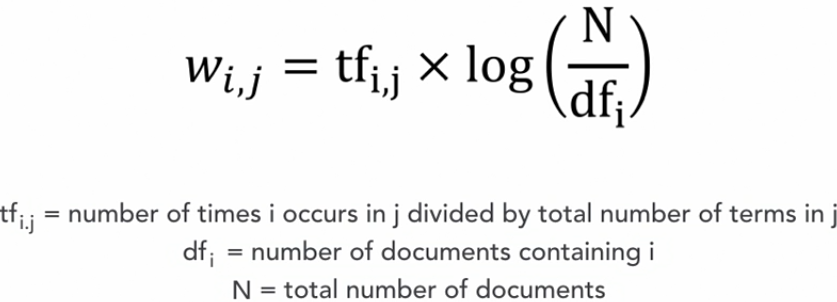

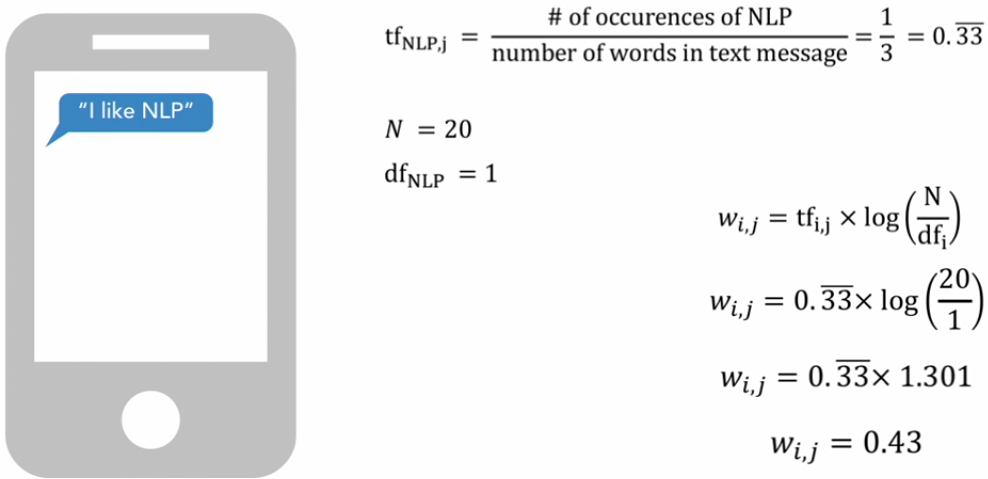

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text_clean'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5568, 8209)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [65]:
data_sample = data[0:20]
tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text_clean'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names_out())

(20, 249)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'a' 'about'
 'aft' 'aid' 'all' 'alreadi' 'and' 'anymor' 'appli' 'ard' 'around' 'as'
 'at' 'b' 'be' 'been' 'bless' 'breather' 'brother' 'call' 'caller'
 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code' 'colour'
 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup' 'custom' 'da'
 'date' 'did' 'dont' 'down' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'final' 'fine' 'finish' 'first' 'for' 'free' 'friend'
 'from' 'fulfil' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'grant' 'ha' 'had'
 'have' 'he' 'help' 'here' 'hi' 'hl' 'home' 'hour' 'how' 'httpwap' 'i'
 'if' 'im' 'in' 'info' 'is' 'it' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341'
 'lar' 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'm'
 'macedonia' 'make' 'may' 'me' 'mell' 'membership' 'me

In [66]:
X_tfidf_sample.df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_sample.df.columns = tfidf_vect_sample.get_feature_names_out()
X_tfidf_sample.df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,your,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.164757,0.164757,0.144823,0.000000,0.000000,0.000000,0.000000,0.239422,0.119711,0.00000
1,0.000000,0.189255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.393277,0.00000
6,0.000000,0.000000,0.208416,0.000000,0.000000,0.000000,0.000000,0.208416,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151434,0.000000,0.00000
7,0.173835,0.000000,0.000000,0.000000,0.000000,0.000000,0.173835,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126307,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.208597,0.000000,0.000000,0.000000,0.208597,0.183360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


<h2><b>4. Feature Engineering</b></h2>
<p>Creating new features or extractring feature out of your data.</p>
<p><b>Creating new features</b><li>Length of text field</li><li>Percentage of characters that are punctuation in the text</li><li>Percentage of characters that are capitalized</li>


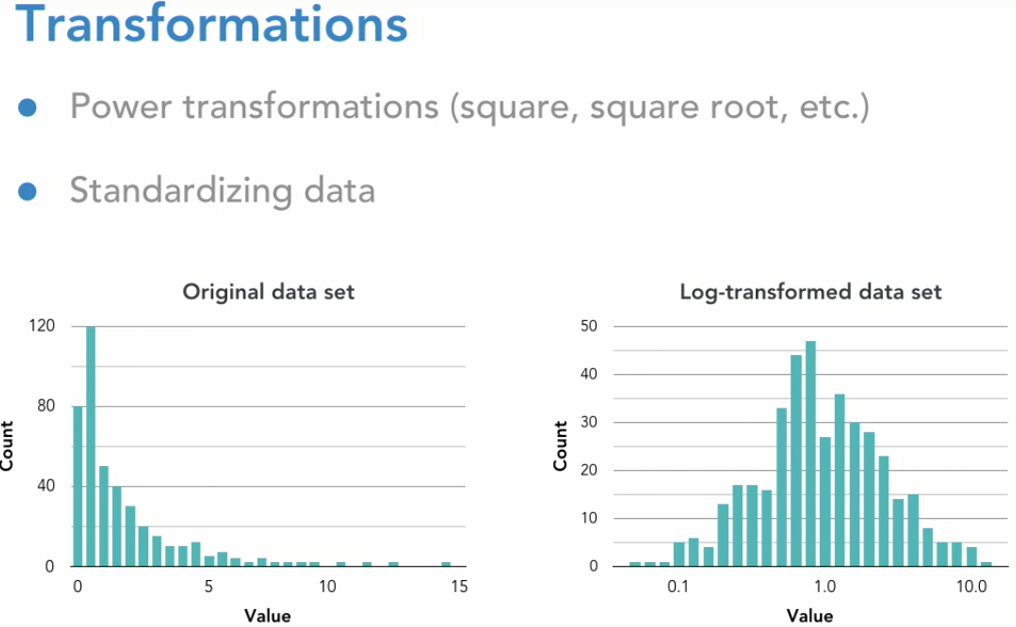

In [67]:
#read in text
import pandas as pd
data1 = pd.read_csv("SMSSpamCollection.tsv",sep='\t')
data1.columns = ('labels','body_text')

In [68]:
#create feature for text message length
data1['body_len'] = data1['body_text'].apply(lambda x: len(x) - x.count(" "))
data1.head()

,labels,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


In [69]:
#create feature for % of punctuation
import string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data1['punct%'] = data1['body_text'].apply(lambda x: count_punct(x))
data1.head()


,labels,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


In [70]:
#evaluate created features
from matplotlib import pyplot
import numpy as np
%matplotlib inline

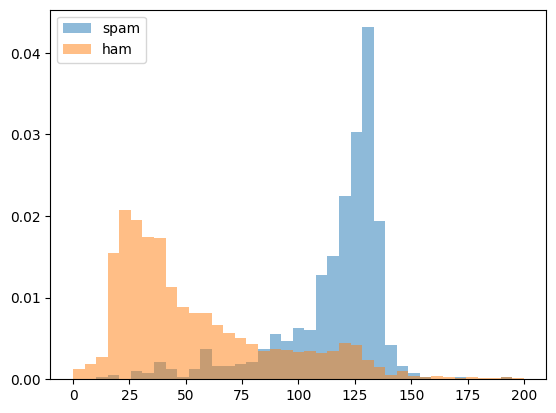

In [71]:
bins = np.linspace(0,200,40)
pyplot.hist(data1[data1['labels']=='spam']['body_len'],bins,alpha=0.5,density=True,label='spam')
pyplot.hist(data1[data1['labels']=='ham']['body_len'],bins,alpha=0.5,density=True,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

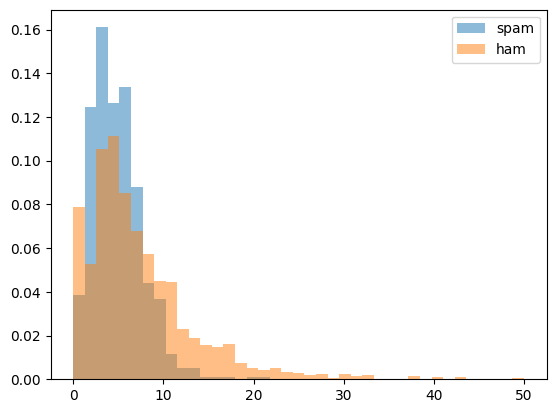

In [72]:
bins = np.linspace(0,50,40)
pyplot.hist(data1[data1['labels']=='spam']['punct%'],bins,alpha=0.5,density=True,label='spam')
pyplot.hist(data1[data1['labels']=='ham']['punct%'],bins,alpha=0.5,density=True,label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

<h3><b>Indentifying features for Transformation</b></h3>


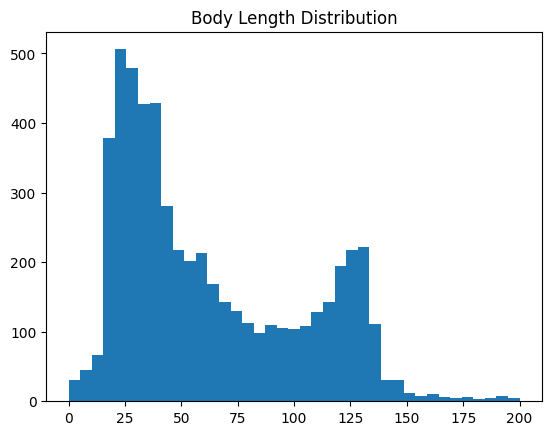

In [73]:
bins = np.linspace(0,200,40)
pyplot.hist(data1['body_len'],bins)
pyplot.title('Body Length Distribution')
pyplot.show()

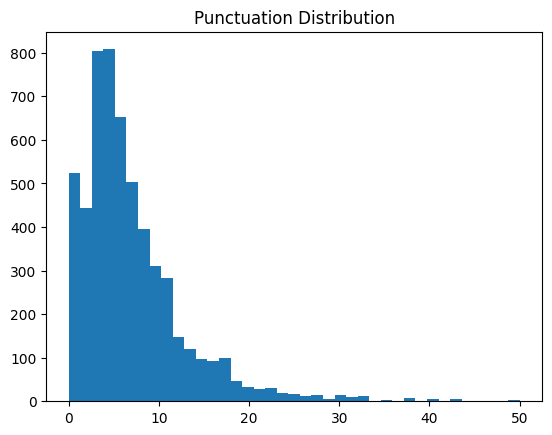

In [74]:
bins = np.linspace(0,50,40)
pyplot.hist(data1['punct%'],bins)
pyplot.title('Punctuation Distribution')
pyplot.show()

<h3><b>Box-Cox Transformation</b></h3>

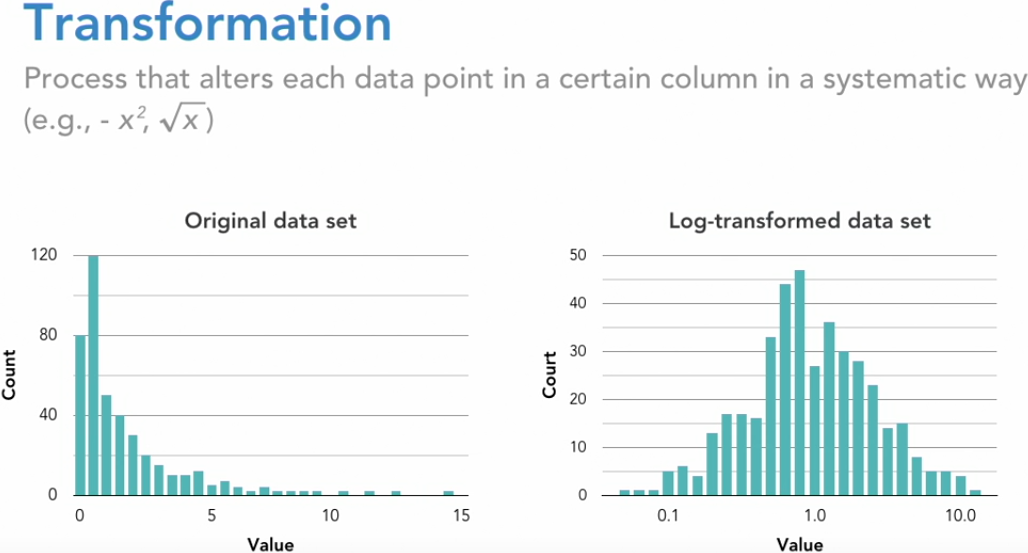

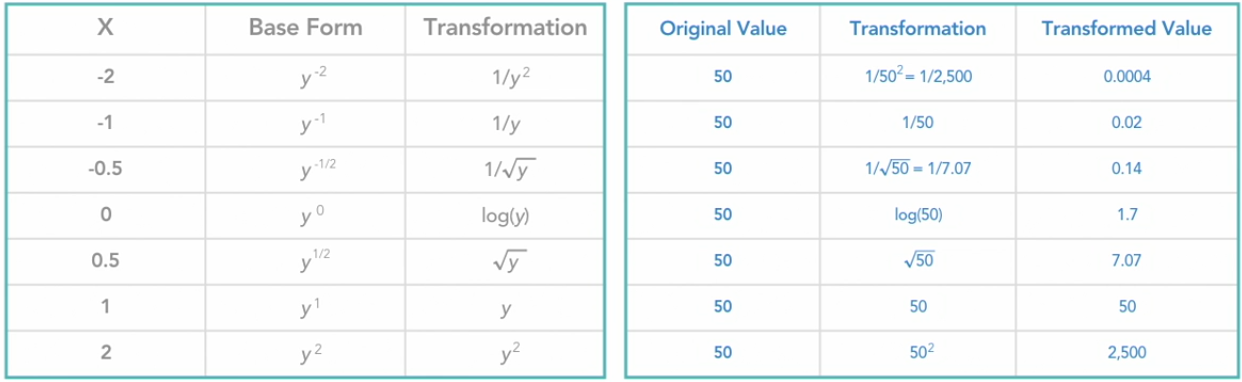

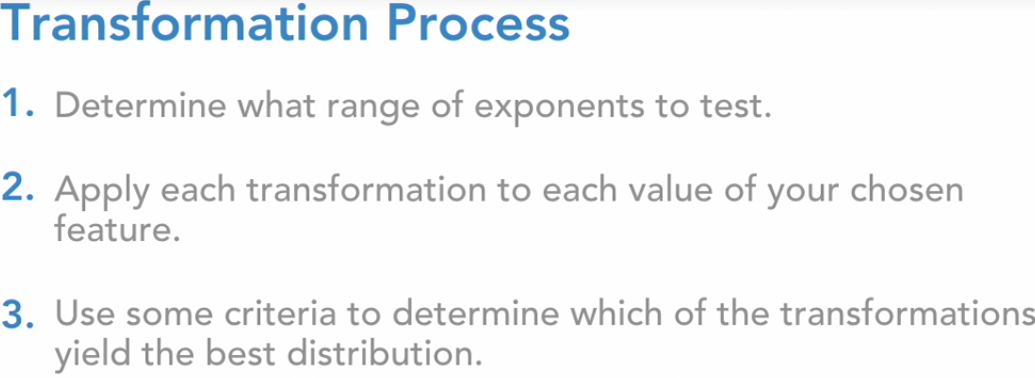

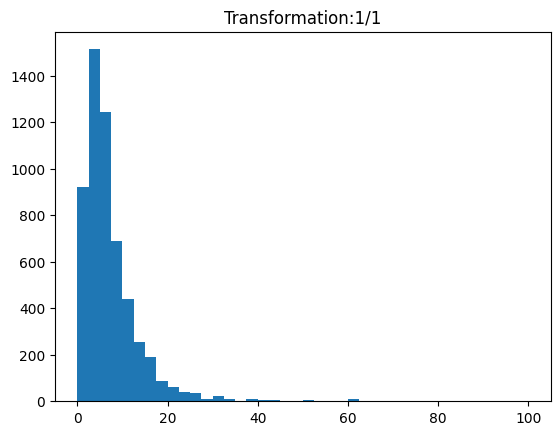

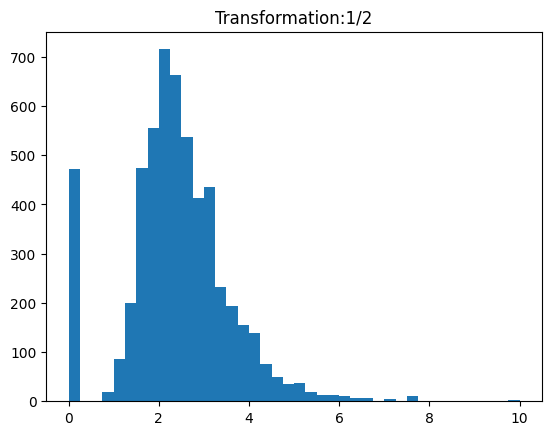

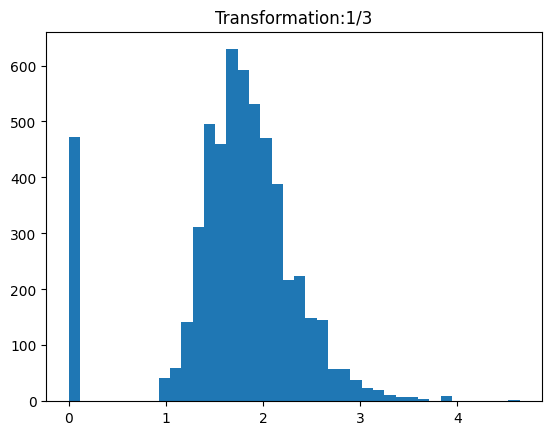

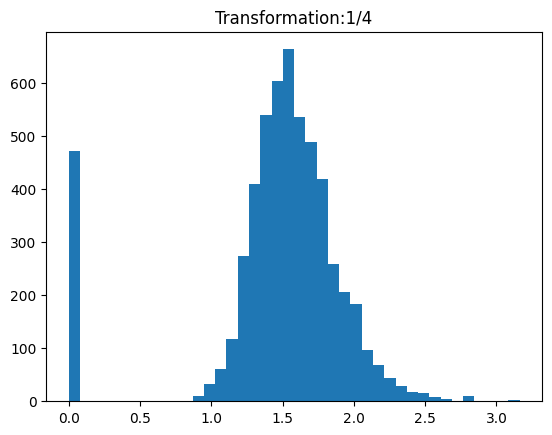

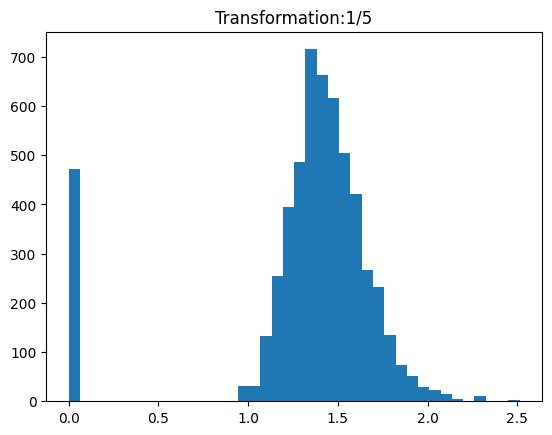

In [75]:
#box cox transformation
for i in [1,2,3,4,5]:
  pyplot.hist((data1['punct%'])**(1/i),bins=40)
  pyplot.title('Transformation:1/{}'.format(str(i)))
  pyplot.show()

<h2><b>5. Building Machine learning Models</b></h2>
<h3><b>Cross validation and evaluation metrics</b></h3>
<p><b>Holdout test set: </b>Sample of data not used in fitting a model for the purpose of evaluating the model's ability to generalise unseen data.</p>
<p><b>K-Fold cross validation: </b> In this process the full data set is k-subsets and the holdout method is repeated k times. That is, in each iteration one of the k-subsets is treated as the holdout test set and the other k-1 subsets are put together to train the model.

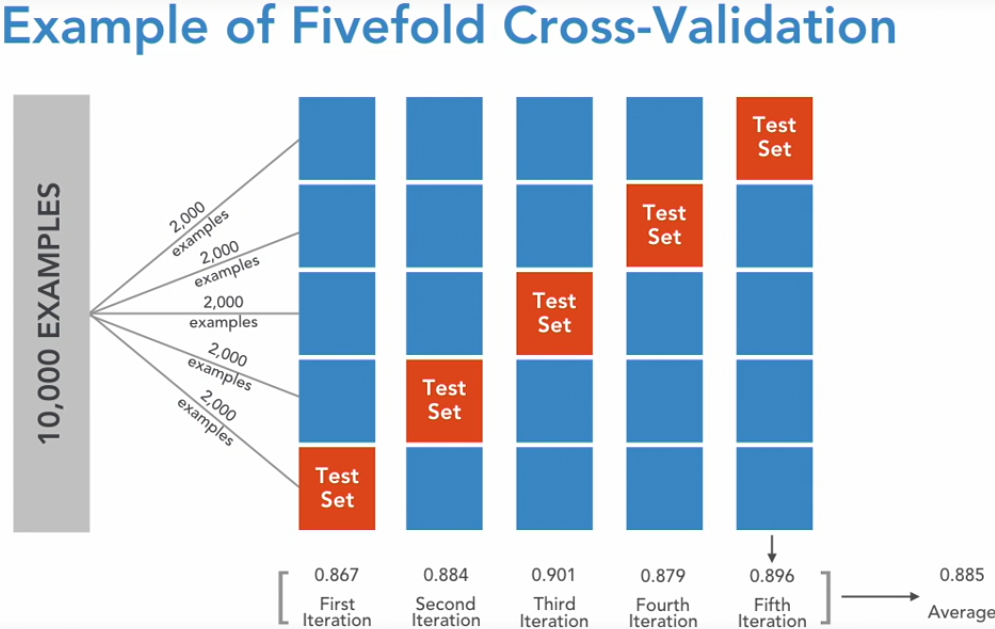

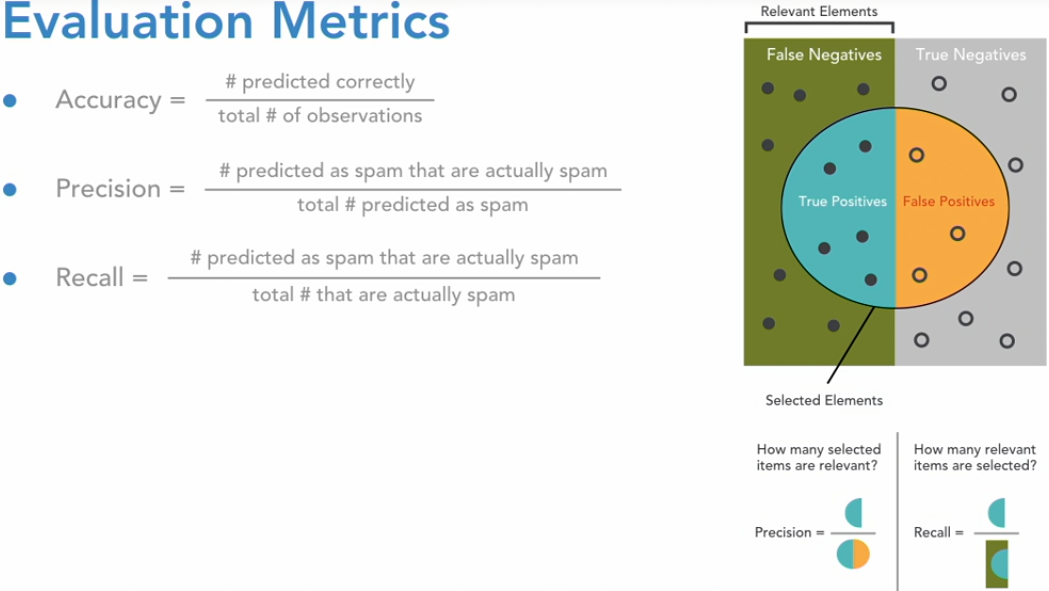

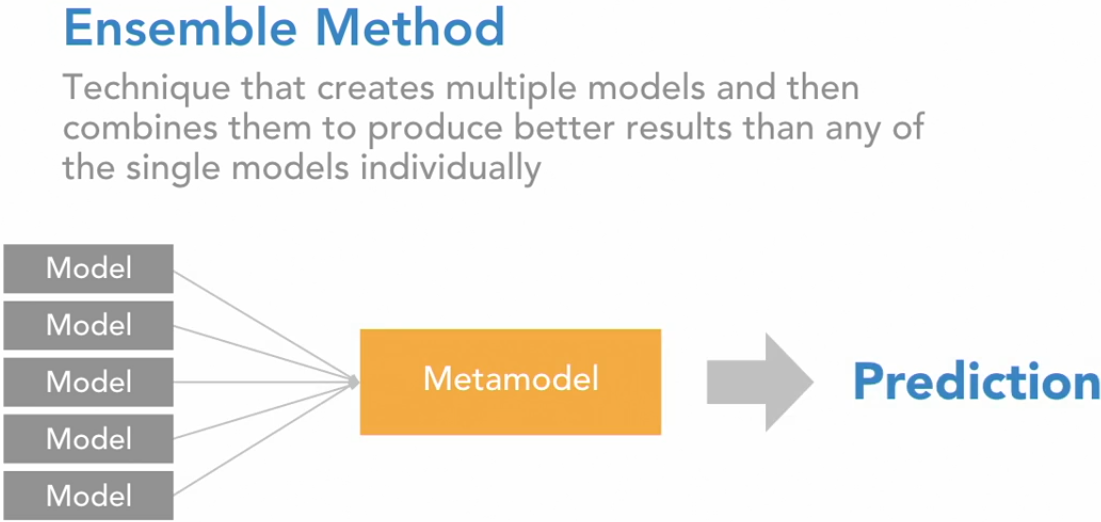

<p><b>Random Forest: </b>Ensemble learning method that constructs a collection of decision trees and the aggregates the predictions of each tree to determine the final prediction</p>
<p><b>Benefits of Ensemble methods</b><li>Can be used for classification or regression</li><li>Easily identify outliers, missing values etc.</li><li>Accepts various types of inputs(continuous , ordinal etc.)</li><li>Less likely to overfit</li><li>Outputs feature importnce</li>

<h3><b>Building a basic random forest model</b></h3>


In [2]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Explore RandomForestClassifier Attributes & Hyperparameters
from sklearn.ensemble import RandomForestClassifier
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_estimators_indices', '_get_metadata_request', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_

In [4]:
#Explore RandomForestClassifier through Cross-Validation
from sklearn.model_selection import KFold, cross_val_score

In [5]:
# Convert all column names to strings
X_features.columns = X_features.columns.astype(str)
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97666068, 0.98294434, 0.97574124, 0.96585804, 0.97574124])

<h3><b>Random Forest with Houldout set</b></h3>

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [8]:
RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [13]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.04320752196567665, 'body_len'),
 (0.0305203160351538, '1803'),
 (0.028777638046556045, '7350'),
 (0.02003419312537393, '2031'),
 (0.019579846889689966, '4796'),
 (0.018695608685543118, '6746'),
 (0.018480347686567054, '3134'),
 (0.016225851188869145, '6285'),
 (0.01421906472018703, '5724'),
 (0.013002424849327083, '7027')]

In [14]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [15]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred), 3)))

Precision: 1.0 / Recall: 0.779 / Accuracy: 0.973


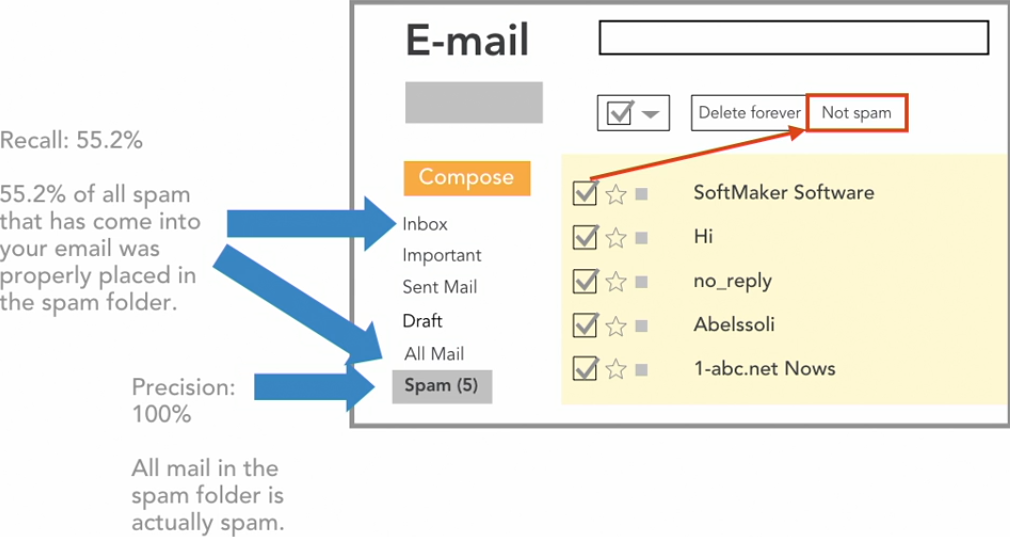

<h3><b>Explore Random Forest with Grid Search</b></h3>
<p><b>Grid search: </b>Exhaistively search for all parameter combinations in a given grid to determine the best model</p>

In [16]:
def train_RF(n_est,depth):
  rf = RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)
  rf_model = rf.fit(X_train,y_train)
  y_pred = rf_model.predict(X_test)
  precision, recall, fscore, support = score(y_test,y_pred,pos_label='spam',average='binary')
  print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision,3),
                                                            round(recall,3),
                                                            round((y_pred==y_test).sum()/len(y_pred),3)))

In [17]:
for n_est in [10,50,100]:
  for depth in [10,20,30,None]:
    train_RF(n_est,depth)

Precision: 1.0 / Recall: 0.206 / Accuracy: 0.903
Precision: 1.0 / Recall: 0.559 / Accuracy: 0.946
Precision: 1.0 / Recall: 0.684 / Accuracy: 0.961
Precision: 1.0 / Recall: 0.713 / Accuracy: 0.965
Precision: 1.0 / Recall: 0.191 / Accuracy: 0.901
Precision: 1.0 / Recall: 0.544 / Accuracy: 0.944
Precision: 1.0 / Recall: 0.64 / Accuracy: 0.956
Precision: 1.0 / Recall: 0.794 / Accuracy: 0.975
Precision: 1.0 / Recall: 0.206 / Accuracy: 0.903
Precision: 1.0 / Recall: 0.529 / Accuracy: 0.943
Precision: 1.0 / Recall: 0.662 / Accuracy: 0.959
Precision: 1.0 / Recall: 0.772 / Accuracy: 0.972


In [19]:
#evaluating the model using cross validation
from sklearn.feature_extraction.text import CountVectorizer
#tf-idf
x_tfidf_feat= pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
#count vectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
x_count_feat= pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_count.toarray())],axis=1)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Convert all feature names to strings
x_tfidf_feat.columns = x_tfidf_feat.columns.astype(str)

rf = RandomForestClassifier()
param = {'n_estimators':[10,50,100],
         'max_depth': [30,60,90,None]}

gs = GridSearchCV(rf,param,cv=5,n_jobs=-1)
gs_fit = gs.fit(x_tfidf_feat,data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,15.303759,0.503892,0.345049,0.122125,90,100,"{'max_depth': 90, 'n_estimators': 100}",0.977558,0.971275,0.975741,0.970350,0.973046,0.973594,0.002703,1
11,15.573780,1.128729,0.241751,0.054112,None,100,"{'max_depth': None, 'n_estimators': 100}",0.977558,0.977558,0.974843,0.964960,0.972147,0.973413,0.004679,2
7,7.815781,1.464495,0.196447,0.018673,90,50,"{'max_depth': 90, 'n_estimators': 50}",0.977558,0.974865,0.972147,0.968553,0.972147,0.973054,0.003016,3
4,6.461391,0.915555,0.200080,0.054997,60,50,"{'max_depth': 60, 'n_estimators': 50}",0.977558,0.974865,0.968553,0.965858,0.972147,0.971797,0.004208,4
6,2.253320,0.602994,0.200324,0.056208,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.973968,0.977558,0.971249,0.959569,0.973944,0.971258,0.006179,5


In [91]:
x_count_feat.columns = x_count_feat.columns.astype(str)

rf = RandomForestClassifier()
param = {'n_estimators':[10,50,100],
         'max_depth': [30,60,90,None]}

gs = GridSearchCV(rf,param,cv=5,n_jobs=-1)
gs_fit = gs.fit(x_count_feat,data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,14.958287,0.622803,0.393658,0.119932,90,100,"{'max_depth': 90, 'n_estimators': 100}",0.975763,0.976661,0.973944,0.972147,0.971249,0.973953,0.002058,1
7,7.260773,0.395060,0.245711,0.098312,90,50,"{'max_depth': 90, 'n_estimators': 50}",0.977558,0.973968,0.973944,0.964061,0.975741,0.973055,0.004691,2
6,2.266786,0.684877,0.233437,0.081205,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.978456,0.972172,0.976640,0.970350,0.964960,0.972516,0.004779,3
11,16.261622,1.312370,0.293962,0.103261,None,100,"{'max_depth': None, 'n_estimators': 100}",0.975763,0.972172,0.973046,0.968553,0.966757,0.971258,0.003222,4
3,1.632650,0.180736,0.157251,0.013934,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.976661,0.973968,0.971249,0.959569,0.973046,0.970898,0.005928,5


<h3><b>Gradient Boosting</b></h3>

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
print(dir(GradientBoostingClassifier))
print(GradientBoostingClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_initialized', '_check_n_features', '_clear_state', '_compute_partial_dependence_recursion', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_encode_y', '_estimator_type', '_fit_stage', '_fit_stages', '_get_default_requests', '_get_doc_link', '_get_loss', '_get_metadata_request', '_get_param_names', '_get_tags', '_init_state', '_is_fitted', '_make_estimator', '_more_tags', '_parameter_constraints', '_raw_predict', 

In [9]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [10]:
def train_GB(n_est, max_depth, lr):
  gb = GradientBoostingClassifier(n_estimators=n_est,max_depth=max_depth,learning_rate=lr)
  gb_model = gb.fit(X_train,y_train)
  y_pred = gb_model.predict(X_test)
  precision, recall, fscore, support = score(y_test,y_pred,pos_label='spam',average='binary')
  print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision,3),
                                                            round(recall,3),
                                                            round((y_pred==y_test).sum()/len(y_pred),3)))

In [14]:
for n_est in [5, 10, 50]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 1.0 / Recall: 0.074 / Accuracy: 0.877
Precision: 0.913 / Recall: 0.709 / Accuracy: 0.952


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 0.959 / Recall: 0.635 / Accuracy: 0.948
Precision: 0.923 / Recall: 0.811 / Accuracy: 0.966


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 0.944 / Recall: 0.682 / Accuracy: 0.952
Precision: 0.902 / Recall: 0.804 / Accuracy: 0.962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 0.949 / Recall: 0.75 / Accuracy: 0.961
Precision: 0.91 / Recall: 0.824 / Accuracy: 0.966


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 0.963 / Recall: 0.534 / Accuracy: 0.935
Precision: 0.924 / Recall: 0.743 / Accuracy: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 0.96 / Recall: 0.649 / Accuracy: 0.95
Precision: 0.917 / Recall: 0.824 / Accuracy: 0.967


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 0.947 / Recall: 0.73 / Accuracy: 0.959
Precision: 0.909 / Recall: 0.811 / Accuracy: 0.964


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 0.95 / Recall: 0.77 / Accuracy: 0.964
Precision: 0.899 / Recall: 0.838 / Accuracy: 0.966


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0 / Recall: 0.0 / Accuracy: 0.867
Precision: 0.936 / Recall: 0.689 / Accuracy: 0.952
Precision: 0.902 / Recall: 0.743 / Accuracy: 0.955
Precision: 1.0 / Recall: 0.02 / Accuracy: 0.87
Precision: 0.951 / Recall: 0.784 / Accuracy: 0.966
Precision: 0.921 / Recall: 0.791 / Accuracy: 0.963
Precision: 1.0 / Recall: 0.027 / Accuracy: 0.871
Precision: 0.921 / Recall: 0.784 / Accuracy: 0.962
Precision: 0.931 / Recall: 0.818 / Accuracy: 0.968
Precision: 1.0 / Recall: 0.007 / Accuracy: 0.868
Precision: 0.93 / Recall: 0.804 / Accuracy: 0.966
Precision: 0.921 / Recall: 0.791 / Accuracy: 0.963


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
x_tfidf_feat= pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)

x_tfidf_feat.columns = x_tfidf_feat.columns.astype(str)
gb = GradientBoostingClassifier()
param = {'n_estimators':[5,10],
         'max_depth': [7,11,15,None],
         'learning_rate':[0.1]
         }
gs = GridSearchCV(gb,param,cv=5,n_jobs=-1)
cv_fit = gs.fit(x_tfidf_feat,data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,53.579754,11.055627,0.290942,0.018600,0.1,None,10,"{'learning_rate': 0.1, 'max_depth': None, 'n_e...",0.957810,0.969479,0.962264,0.963163,0.961366,0.962816,0.003795,1
6,28.970150,5.437830,0.298598,0.088755,0.1,None,5,"{'learning_rate': 0.1, 'max_depth': None, 'n_e...",0.956912,0.967684,0.962264,0.964061,0.962264,0.962637,0.003480,2
5,23.372683,1.166357,0.333581,0.138713,0.1,15,10,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.958707,0.968582,0.961366,0.959569,0.955975,0.960840,0.004244,3
3,19.250728,0.900837,0.268804,0.022474,0.1,11,10,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.957810,0.968582,0.957772,0.955076,0.955076,0.958863,0.005009,4
4,13.081266,0.312484,0.292713,0.021185,0.1,15,5,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.953321,0.964991,0.957772,0.950584,0.951482,0.955630,0.005295,5


<h3><b>Model Selection: Data Prep and Results</b></h3>
<p><b>Machine learning Pipeline</b>
<li>Read in raw text </li><li>Clean text and tokenize</li><li>Feature engineering</li><li>Fit simple model</li><li>Tune hyperparameters and evaluate with GridsearchCV<li>Final model selection</li></p>
<p><b>Bending the rules a bit: </b> Vectorizers should be fit on the training set and only be used to transform the test set.</p>
<p><b>Process</b>
<li>Split the data into training and test data</li>
<li>Train vectorizers on training set and use that to transform test set</li>
<li>Fit best random forest model and best gradient boosting model on training set and predict on test set.</li>
<li>Thoughroughly evaluate the results of these two models and select the best model</li>



In [20]:
#Read in & clean text

import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [21]:
#Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

In [22]:
#Vectorize text
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7042,7043,7044,7045,7046,7047,7048,7049,7050,7051
0,69,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,138,8.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Final evaluation of models

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [25]:
# Convert all column names to strings
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

In [30]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()

rf_model = rf.fit(X_train_vect, y_train)

end = time.time()
fit_time = (end - start)

start = time.time()

y_pred = rf_model.predict(X_test_vect)

end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time,3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 11.061 / Predict time: 0.17 ---- Precision: 1.0 / Recall: 0.848 / Accuracy: 0.979


In [31]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()

gb_model = gb.fit(X_train_vect, y_train)

end = time.time()
fit_time = (end - start)

start = time.time()

y_pred = gb_model.predict(X_test_vect)

end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')


print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time,3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 200.299 / Predict time: 0.222 ---- Precision: 0.921 / Recall: 0.854 / Accuracy: 0.97
